In [1]:
#from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import warnings

%matplotlib inline 
warnings.filterwarnings('ignore')
#print(os.listdir("../"))

In [2]:
# Read data

data_file = "SuperMarketData.csv"
df = pd.read_csv(data_file)
df.head()

,CustomerID,Gender,Age,Monthly Income (kRs),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# rename column

df.rename(index=str, columns={'Monthly Income (kRs)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


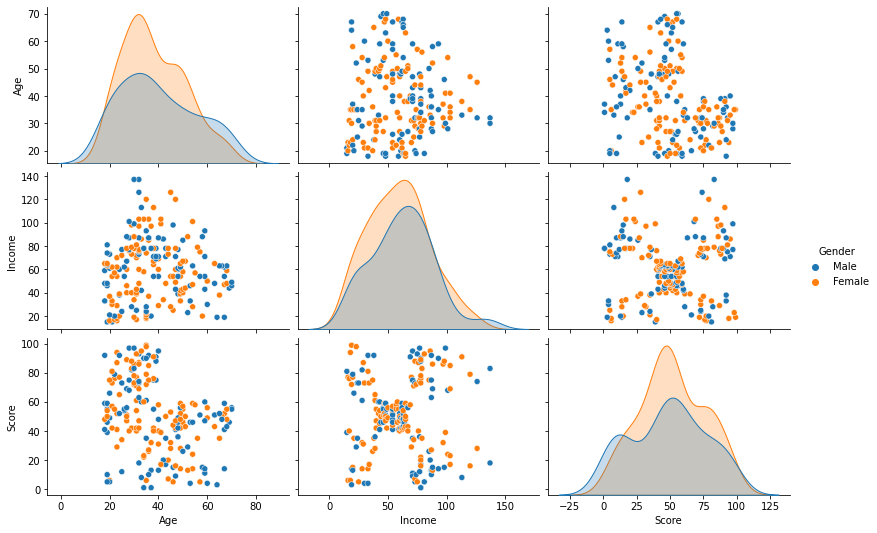

In [6]:
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

In [7]:
# From the above plot we see that gender has no direct relation to segmenting customers. 
#That's why we can drop it and move on with other features which is why 
#we will X parameter from now on.
X = df.drop(['CustomerID', 'Gender'], axis=1)

### Mean Shift Algorithm


MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.



In [10]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [12]:
X.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [17]:
# The following bandwidth can be automatically detected using

bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth, bin_seeding=True)

ms.fit(X)

X['Labels'] = ms.labels_
# geting cluster label for each row.

X.head()

,Age,Income,Score,Labels
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4


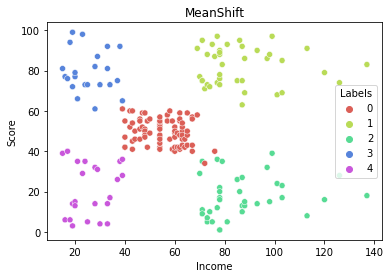

In [20]:
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

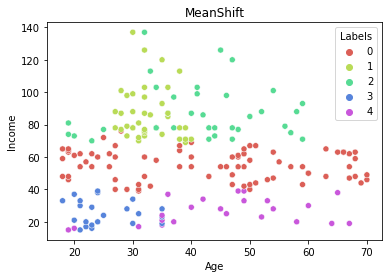

In [21]:
sns.scatterplot(X['Age'], X['Income'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()
# no clear clustring, as we see in pairplot.